# PROACTIVE FRAUD DETECTION MODEL

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd

# read csv file
data = pd.read_csv("Fraud.csv")

# print csv file
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [2]:
# check for missing values
missingValues = data.isnull().sum()
print(missingValues)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [3]:
# check for outlier detection using IQR
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['amount'] < (Q1 - 1.5 * IQR)) | (data['amount'] > (Q3 + 1.5 * IQR))]

print(outliers)

         step      type      amount     nameOrig  oldbalanceOrg  \
85          1  TRANSFER  1505626.01   C926859124           0.00   
86          1  TRANSFER   554026.99  C1603696865           0.00   
88          1  TRANSFER   761507.39   C412788346           0.00   
89          1  TRANSFER  1429051.47  C1520267010           0.00   
93          1  TRANSFER   583848.46  C1839168128           0.00   
...       ...       ...         ...          ...            ...   
6362613   743  CASH_OUT  1258818.82  C1436118706     1258818.82   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
85                  0.0   C665576141        29031.00      5515763.34        0   
86                  0.0   C766572

In [4]:
# handling outliers
'''
We will cap the extreme values to a certain threshold, such as 99th percentile.
'''
upper_limit = data['amount'].quantile(0.99)
data['amount'] = np.where(data['amount'] > upper_limit, upper_limit, data['amount'])

print(data)

         step      type        amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT  9.839640e+03  C1231006815      170136.00   
1           1   PAYMENT  1.864280e+03  C1666544295       21249.00   
2           1  TRANSFER  1.810000e+02  C1305486145         181.00   
3           1  CASH_OUT  1.810000e+02   C840083671         181.00   
4           1   PAYMENT  1.166814e+04  C2048537720       41554.00   
...       ...       ...           ...          ...            ...   
6362615   743  CASH_OUT  3.396821e+05   C786484425      339682.13   
6362616   743  TRANSFER  1.615979e+06  C1529008245     6311409.28   
6362617   743  CASH_OUT  1.615979e+06  C1162922333     6311409.28   
6362618   743  TRANSFER  8.500025e+05  C1685995037      850002.52   
6362619   743  CASH_OUT  8.500025e+05  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1        

In [5]:
# multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

          feature         VIF
0            step    1.372710
1          amount    1.730142
2   oldbalanceOrg  466.676673
3  newbalanceOrig  468.493105
4  oldbalanceDest   29.637969
5  newbalanceDest   31.295399


In [6]:
# reducing multicollinearity
'''
we will keep `oldbalanceOrg` and `oldbalanceDest` and drop `newbalanceOrig` and `newbalanceDest`
'''

data = data.drop(['newbalanceOrig', 'newbalanceDest'], axis=1)

print(data)

         step      type        amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT  9.839640e+03  C1231006815      170136.00   
1           1   PAYMENT  1.864280e+03  C1666544295       21249.00   
2           1  TRANSFER  1.810000e+02  C1305486145         181.00   
3           1  CASH_OUT  1.810000e+02   C840083671         181.00   
4           1   PAYMENT  1.166814e+04  C2048537720       41554.00   
...       ...       ...           ...          ...            ...   
6362615   743  CASH_OUT  3.396821e+05   C786484425      339682.13   
6362616   743  TRANSFER  1.615979e+06  C1529008245     6311409.28   
6362617   743  CASH_OUT  1.615979e+06  C1162922333     6311409.28   
6362618   743  TRANSFER  8.500025e+05  C1685995037      850002.52   
6362619   743  CASH_OUT  8.500025e+05  C1280323807      850002.52   

            nameDest  oldbalanceDest  isFraud  isFlaggedFraud  
0        M1979787155            0.00        0               0  
1        M2044282225            0.00       

In [7]:
# rechecking multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Updated feature set
X = data[['step', 'amount', 'oldbalanceOrg', 'oldbalanceDest']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

          feature       VIF
0            step  1.351859
1          amount  1.373808
2   oldbalanceOrg  1.067211
3  oldbalanceDest  1.165052


In [8]:
# model implementation

# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [9]:
# feature engineering
data['balanceOrig_diff'] = data['oldbalanceOrg'] - data['amount']
data['balanceDest_diff'] = data['oldbalanceDest'] + data['amount']

print(data)

         step      type        amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT  9.839640e+03  C1231006815      170136.00   
1           1   PAYMENT  1.864280e+03  C1666544295       21249.00   
2           1  TRANSFER  1.810000e+02  C1305486145         181.00   
3           1  CASH_OUT  1.810000e+02   C840083671         181.00   
4           1   PAYMENT  1.166814e+04  C2048537720       41554.00   
...       ...       ...           ...          ...            ...   
6362615   743  CASH_OUT  3.396821e+05   C786484425      339682.13   
6362616   743  TRANSFER  1.615979e+06  C1529008245     6311409.28   
6362617   743  CASH_OUT  1.615979e+06  C1162922333     6311409.28   
6362618   743  TRANSFER  8.500025e+05  C1685995037      850002.52   
6362619   743  CASH_OUT  8.500025e+05  C1280323807      850002.52   

            nameDest  oldbalanceDest  isFraud  isFlaggedFraud  \
0        M1979787155            0.00        0               0   
1        M2044282225            0.00     

In [10]:
# updated feature set
X = data[['step', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'balanceOrig_diff', 'balanceDest_diff']]
y = data['isFraud']

print(X.head())
print(y.head())

   step    amount  oldbalanceOrg  oldbalanceDest  balanceOrig_diff  \
0     1   9839.64       170136.0             0.0         160296.36   
1     1   1864.28        21249.0             0.0          19384.72   
2     1    181.00          181.0             0.0              0.00   
3     1    181.00          181.0         21182.0              0.00   
4     1  11668.14        41554.0             0.0          29885.86   

   balanceDest_diff  
0           9839.64  
1           1864.28  
2            181.00  
3          21363.00  
4          11668.14  
0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64


In [11]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

         step        amount  oldbalanceOrg  oldbalanceDest  balanceOrig_diff  \
2408104   202  2.677198e+04       27521.00      7175503.03      7.490200e+02   
662430     36  3.448797e+05           0.00      3731846.57     -3.448797e+05   
496595     20  1.615979e+06           0.00      3329828.01     -1.615979e+06   
5053741   354  3.773935e+04       66684.93            0.00      2.894558e+04   
755621     38  3.760551e+05       22501.00       182350.43     -3.535541e+05   

         balanceDest_diff  
2408104      7.202275e+06  
662430       4.076726e+06  
496595       4.945807e+06  
5053741      3.773935e+04  
755621       5.584056e+05  
         step      amount  oldbalanceOrg  oldbalanceDest  balanceOrig_diff  \
3737323   278   330218.42       20866.00       452419.57        -309352.42   
264914     15    11647.08       30370.00            0.00          18722.92   
85647      10   152264.21      106589.00       201303.01         -45675.21   
5899326   403  1551760.63           0.0

In [12]:
# initialize the model
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

In [13]:
# fit the model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [14]:
# save the trained model
from joblib import dump
dump(model, 'fraud_detection_model.joblib')

['fraud_detection_model.joblib']

In [15]:
# load the trained model
from joblib import load
model = load('fraud_detection_model.joblib')

In [16]:
# predict on test data
y_pred = model.predict(X_test)

print(y_pred)

[0 0 0 ... 0 0 0]


In [17]:
# evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROU AUC Score: ", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       1.00      1.00      1.00      2435

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786

[[1906342       9]
 [     10    2425]]
ROU AUC Score:  0.9979442513789827


In [18]:
# import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Subset selection
subset_size = 0.1
subset_indices = np.random.choice(len(X_train), size=int(len(X_train) * subset_size), replace=False)
X_train_subset = X_train.iloc[subset_indices]
y_train_subset = y_train.iloc[subset_indices]

# Initialize Random Forest model
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=5, step=1, verbose=1)

# Fit RFE
rfe.fit(X_train_subset, y_train_subset)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected features: ", selected_features)

Fitting estimator with 6 features.
Selected features:  Index(['step', 'amount', 'oldbalanceOrg', 'balanceOrig_diff',
       'balanceDest_diff'],
      dtype='object')


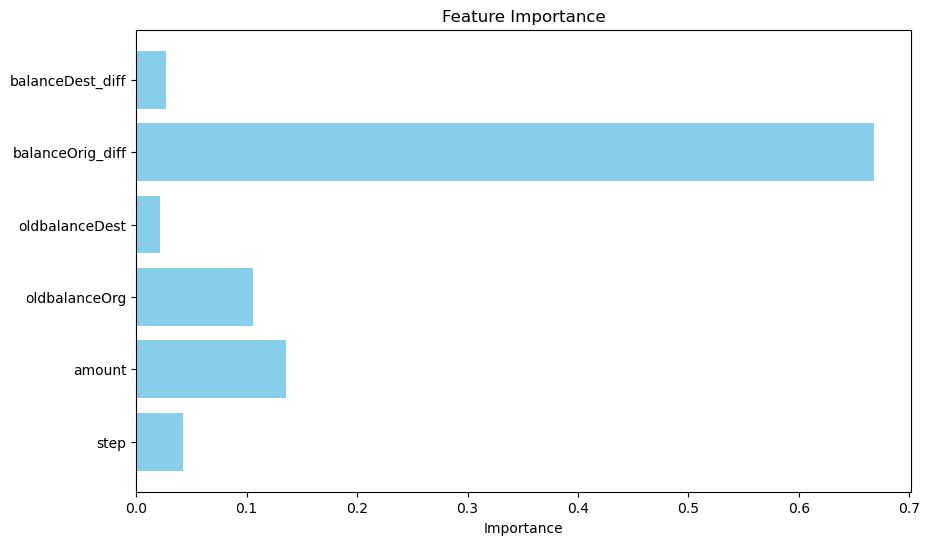

In [20]:
import matplotlib.pyplot as plt

model = load('fraud_detection_model.joblib')

# feature importance
feature_importance = model.feature_importances_
features = X.columns

# plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
# Post-Implementation Analysis
pre_implementation_fraud_rate = data[data['step'] < 600]['isFraud'].mean()
post_implementation_fraud_rate = data[data['step'] >= 600]['isFraud'].mean()

print("Pre-Implementation Fraud Rate: ", pre_implementation_fraud_rate)
print("Post-Implementation Fraud Rate: ", post_implementation_fraud_rate)

# A/B testing - Group A is control and Group B is test group
groupA = data[data['step'] < 600]
groupB = data[data['step'] >= 600]

groupA_fraud_rate = groupA['isFraud'].mean()
groupB_fraud_rate = groupB['isFraud'].mean()

print("Group A Fraud Rate : ", groupA_fraud_rate)
print("Group B Fraud Rate : ", groupB_fraud_rate)